In [14]:
from data import CrowdDataSet 
import matplotlib.pyplot as plt
import numpy as np
from data import CrowdDataSet 
from data import default_train_transforms, default_val_transforms
from torchvision import transforms
from PIL import Image
from utils import get_density_map_gaussian

loaders = {
    "train": CrowdDataSet(
        'part_A/train_data', default_train_transforms()
    ),
    "val": CrowdDataSet(
        'part_A/test_data', default_val_transforms()
    )
}

In [15]:
import torch

model = torch.load('saved_models/vgg16_density_map')
model.eval()

train_vgg16_predictions = []
train_vgg16_actual = []

for i, data in enumerate(loaders['train'], 0):
    dt = data

    image = dt['image'].to()
    gt = dt['gt']
    
    model.eval()
    predictions = model(image[None, ...].float())
    predictions = predictions.squeeze().data.cpu().numpy() 
    count = np.sum(predictions) / 100
    
    k = np.zeros((image.shape[0], image.shape[1]))
    k = get_density_map_gaussian(k, gt, adaptive_mode=False)
        
    train_vgg16_predictions.append(count)
    train_vgg16_actual.append(np.sum(k))

In [16]:
test_vgg16_predictions = []
test_vgg16_actual = []
for i, data in enumerate(loaders['val'], 0):
    dt = data

    image = dt['image'].to()
    gt = dt['gt']
    
    model.eval()
    predictions = model(image[None, ...].float())
    predictions = predictions.squeeze().data.cpu().numpy() 
    count = np.sum(predictions) / 100
    
    k = np.zeros((image.shape[0], image.shape[1]))
    k = get_density_map_gaussian(k, gt, adaptive_mode=False)
        
    test_vgg16_predictions.append(count)
    test_vgg16_actual.append(np.sum(k))

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for i, act in enumerate(train_vgg16_actual):
    if np.isnan(act):
        train_vgg16_actual[i] = 0
for i, act in enumerate(test_vgg16_actual):
    if np.isnan(act):
        test_vgg16_actual[i] = 0

train_r2 = r2_score([float(x) for x in train_vgg16_actual], [float(x) for x in train_vgg16_predictions])
test_r2 = r2_score([float(x) for x in test_vgg16_actual], [float(x) for x in test_vgg16_predictions])
train_mse = mean_squared_error(train_vgg16_actual, train_vgg16_predictions)
test_mse = mean_squared_error(test_vgg16_actual, test_vgg16_predictions)

print("VGG16")
print('Training r2: {}'.format(train_r2))
print('Testing r2: {}'.format(test_r2))
print('Training MSE: {}'.format(train_mse))
print('Testing MSE: {}'.format(test_mse))

VGG16
Training r2: 0.6985615888676489
Testing r2: 0.7240640572621571
Training MSE: 2775.406116119759
Testing MSE: 1040.2956329347812


Text(0, 0.5, 'Predictions')

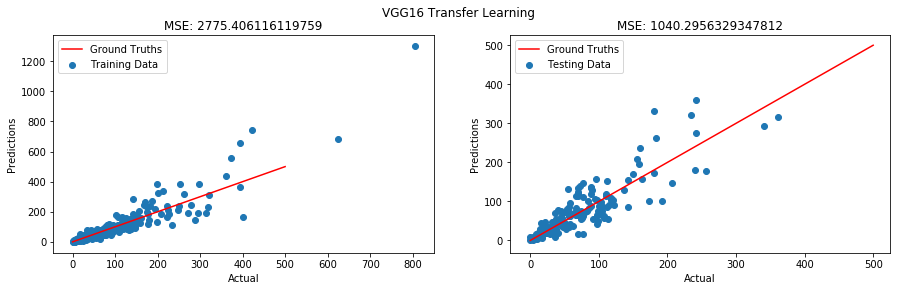

In [18]:
fg, (p1, p2) = plt.subplots(1, 2, figsize=(15, 4))

fg.suptitle('VGG16 Transfer Learning')

x = np.linspace(0,500,1000)
y = x
p1.plot(x, y, '-r', label='Ground Truths')
p1.scatter(train_vgg16_actual, train_vgg16_predictions, label='Training Data')
p1.legend()
p1.set_title('MSE: {}'.format(train_mse))
p1.set_xlabel('Actual')
p1.set_ylabel('Predictions')

p2.plot(x, y, '-r', label='Ground Truths')
p2.scatter(test_vgg16_actual, test_vgg16_predictions, label='Testing Data')
p2.legend()
p2.set_title('MSE: {}'.format(test_mse))
p2.set_xlabel('Actual')
p2.set_ylabel('Predictions')

In [7]:
model = torch.load('saved_models/resnet18_adaptive')
model.eval()

train_resnet18_predictions = []
train_resnet18_actual = []

for i, data in enumerate(loaders['train'], 0):
    dt = data

    image = dt['image'].to()
    gt = dt['gt']
    
    model.eval()
    predictions = model(image[None, ...].float())
    predictions = predictions.squeeze().data.cpu().numpy() 
    count = np.sum(predictions) / 100
    
    k = np.zeros((image.shape[0], image.shape[1]))
    k = get_density_map_gaussian(k, gt, adaptive_mode=False)
        
    train_resnet18_predictions.append(count)
    train_resnet18_actual.append(np.sum(k))

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\torch\nn\functional.py:3325: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [8]:
test_resnet18_predictions = []
test_resnet18_actual = []
for i, data in enumerate(loaders['val'], 0):
    dt = data

    image = dt['image'].to()
    gt = dt['gt']
    
    model.eval()
    predictions = model(image[None, ...].float())
    predictions = predictions.squeeze().data.cpu().numpy() 
    count = np.sum(predictions) / 100
    
    k = np.zeros((image.shape[0], image.shape[1]))
    k = get_density_map_gaussian(k, gt, adaptive_mode=False)
        
    test_resnet18_predictions.append(count)
    test_resnet18_actual.append(np.sum(k))

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for i, act in enumerate(train_resnet18_actual):
    if np.isnan(act):
        train_resnet18_actual[i] = 0
for i, act in enumerate(test_resnet18_actual):
    if np.isnan(act):
        test_resnet18_actual[i] = 0

train_r2 = r2_score([float(x) for x in train_resnet18_actual], [float(x) for x in train_resnet18_predictions])
test_r2 = r2_score([float(x) for x in test_resnet18_actual], [float(x) for x in test_resnet18_predictions])
train_mse = mean_squared_error(train_resnet18_actual, train_resnet18_predictions)
test_mse = mean_squared_error(test_resnet18_actual, test_resnet18_predictions)

print("ResNet18")
print('Training r2: {}'.format(train_r2))
print('Testing r2: {}'.format(test_r2))
print('Training MSE: {}'.format(train_mse))
print('Testing MSE: {}'.format(test_mse))

ResNet18
Training r2: -0.8117723647713362
Testing r2: -1.2124612348969257
Training MSE: 16681.364804551493
Testing MSE: 8341.116194809923


Text(0, 0.5, 'Predictions')

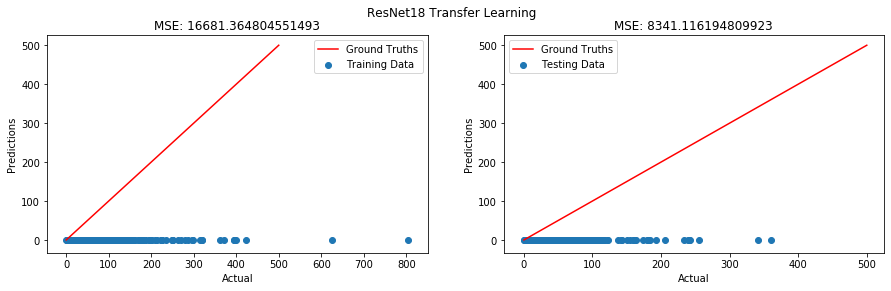

In [10]:
fg, (p1, p2) = plt.subplots(1, 2, figsize=(15, 4))

fg.suptitle('ResNet18 Transfer Learning')

x = np.linspace(0,500,1000)
y = x
p1.plot(x, y, '-r', label='Ground Truths')
p1.scatter(train_resnet18_actual, train_resnet18_predictions, label='Training Data')
p1.legend()
p1.set_title('MSE: {}'.format(train_mse))
p1.set_xlabel('Actual')
p1.set_ylabel('Predictions')

p2.plot(x, y, '-r', label='Ground Truths')
p2.scatter(test_resnet18_actual, test_resnet18_predictions, label='Testing Data')
p2.legend()
p2.set_title('MSE: {}'.format(test_mse))
p2.set_xlabel('Actual')
p2.set_ylabel('Predictions')

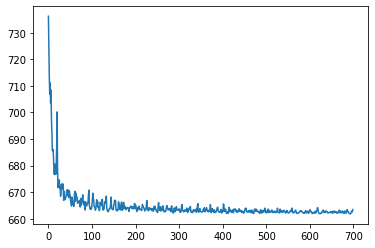

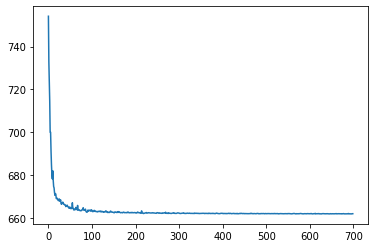

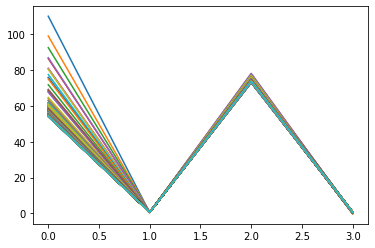

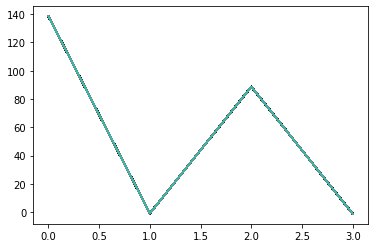

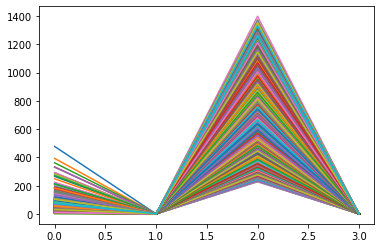

In [11]:
vgg16loss = np.load('loss_experiments/vgg16_losses.npy')
resnet18loss = np.load('loss_experiments/resnet18_losses.npy')
vgg16loss_adaptive = np.load('loss_experiments/vgg16_losses_adaptive.npy')
resnet18loss_adaptive = np.load('loss_experiments/resnet18_adaptive_losses.npy')
vgg16class_loss = np.load('loss_experiments/vgg16_classification_losses.npy')

plt.plot(np.arange(len(vgg16loss)), vgg16loss)
plt.show()

plt.plot(np.arange(len(resnet18loss)), resnet18loss)
plt.show()

plt.plot(np.arange(len(vgg16loss_adaptive)), vgg16loss_adaptive)
plt.show()

plt.plot(np.arange(len(resnet18loss_adaptive)), resnet18loss_adaptive)
plt.show()

plt.plot(np.arange(len(vgg16class_loss)), vgg16class_loss)
plt.show()

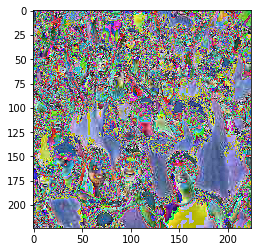

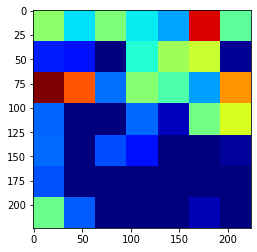

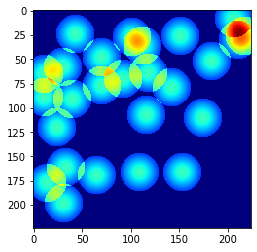

26.7548193359375 26.000002 26


In [20]:
model = torch.load('saved_models/vgg16_density_map')
model.eval()

dt = loaders['train'][3]

image = dt['image'].to()
gt = dt['gt']

predictions = model(image[None, ...].float())
predictions = predictions.squeeze().data.cpu().numpy() 
count = np.sum(predictions) / 100

transformed_img = transforms.ToPILImage()(dt['image']).convert('RGB')

k = np.zeros((transformed_img.width, transformed_img.height))
k = get_density_map_gaussian(k, gt, adaptive_mode=False)
plt.imshow(transformed_img)
plt.show()
plt.imshow(predictions, cmap=plt.cm.jet)
plt.show()
plt.imshow(k, cmap=plt.cm.jet)
plt.show()

print(np.sum(predictions)/ 100, np.sum(k), len(dt['gt']))